# Manhattan and Downtown Toronto Top Venues Comparison: Are the Top trending venues similar?


# 1. Introduction

**Purpose:** The purpose of the analysis is to compare the Top vanues found in the Boroughs of Manhattan (NYC) and DownTown Toronto (TO), using the foursquare API and the data provided during the course. 
Even though the two Boroughs differs in terms of population density and geographical areas, they are the most central Boroughs of the two cities with similarities in terms of architectural strucuture. Are Top vanues in the two cities showing similar patterns?
Here below the steps of the analysis:


**1.** Import and preprocess the data from the web in order to identify the location and the Neighborhoods belonging to the two Boroughs.


**2.** Run a cluster Analysis on the 2 boroughs.


**3.** Analyse the results and see which cluster are more similar in terms of Top Trending Venues.


**4.** Conclusion.

**Target Audience:** Everyone who is interested in exploring the two neighborhoods discovering the top venues in the two cities. The comparison could serve as an idea in order to understand what could be the most attractive Borough to visit, based on individual preferences.

**Source Data used:**


 **1.** Data sources used during the course.
 
 
 **2.** Foursquare API.



# 2. Data

Data section will start by importing all the necessary libraries in order to run the analysis and preprocessing the data in order to get all the neighborhoods present in Downtown Toronto and Manhattan. The section will finish with a visual result of all the Neighborhoods included in Manhattan and Downtown Toronto using Folium.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


from bs4 import BeautifulSoup
import requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
#Import data from wikipedia using Beautiful Soup
url_file = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup = BeautifulSoup(url_file.content, "html5lib")
Data = pd.read_html(str(soup.table))[0]
Data = Data.dropna(axis = 0).reset_index(drop=True)

#Import coordinates
GeoData = pd.read_csv('http://cocl.us/Geospatial_data')

#Merge the two dataset and subset for Boroughs that contains Toronto
Toronto_Data = Data.merge(GeoData, on = 'Postal Code')
Toronto_Data.head()
Toronto_Data = Toronto_Data[Toronto_Data['Borough'].str.contains('Toronto')]
Toronto_Data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [4]:
#Import NYC data as shown in the lab

!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
NY = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
NYC_Data = pd.DataFrame(columns=column_names)

for data in NY:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NYC_Data = NYC_Data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
NYC_Data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [5]:
#Subset Toronto and NYC data for the Boroughs of interest
Downtown_Toronto = Toronto_Data[Toronto_Data['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Manhattan = NYC_Data[NYC_Data['Borough'] == 'Manhattan'].reset_index(drop=True)

In [6]:
#Visualise Neighborhoods in Downtown Toronto
map_Downtown_Toronto = folium.Map(location=[43.6515, -79.3835], zoom_start=10)
for lat, lng, borough, neighborhood in zip(Downtown_Toronto['Latitude'], Downtown_Toronto['Longitude'], Downtown_Toronto['Borough'], Downtown_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Downtown_Toronto) 
    
map_Downtown_Toronto

In [6]:
map_Downtown_Toronto.save('Dowtown Toronto.png')

In [7]:
#Visualise Neighborhoods in Manhattan
map_manhattan = folium.Map(location=[40.78343, -73.96625], zoom_start=11)
for lat, lng, label in zip(Manhattan['Latitude'], Manhattan['Longitude'], Manhattan['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

# 3. Methodology

Methodology Section will start by Getting the Top venues for the two Boroughs using the Foursquare API. The analysis will continue by sorting the top venues in every neighborhood and grouping similar neighborhoods into clusters on the two Boroughs.



In [8]:
#Setting FourSquare Credentials and version

CLIENT_ID = 'HXPXSOAX3TNWPOGOSLYTYJQVS20KDJRZU233WJZQ1RY3FJ24' # your Foursquare ID
CLIENT_SECRET = 'NNQRCRWLWEY3S5BVDQ3JOCL3SQXAAN2WUP0FNG04P0R234AJ' # your Foursquare Secret
VERSION = '20180604'


In [9]:
#Function to get venues in Downtown Toronto and Manhattan --> From Lab

limit = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
#Getting venues in Downtown Toronto and Manhattan
Downtown_Tor_venues = getNearbyVenues(names=Downtown_Toronto['Neighborhood'],
                                   latitudes=Downtown_Toronto['Latitude'],
                                   longitudes=Downtown_Toronto['Longitude']
                                  )

Manhattan_venues = getNearbyVenues(names=Manhattan['Neighborhood'],
                                   latitudes=Manhattan['Latitude'],
                                   longitudes=Manhattan['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley
Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill


In [12]:
# one hot encoding
Downtown_Tor_onehot = pd.get_dummies(Downtown_Tor_venues[['Venue Category']], prefix="", prefix_sep="")
Manhattan_onehot = pd.get_dummies(Manhattan_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
Downtown_Tor_onehot['Neighborhood'] = Downtown_Tor_venues['Neighborhood'] 
Manhattan_onehot['Neighborhood'] = Manhattan_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns_Tor = [Downtown_Tor_onehot.columns[-1]] + list(Downtown_Tor_onehot.columns[:-1])
fixed_columns_Man = [Manhattan_onehot.columns[-1]] + list(Manhattan_onehot.columns[:-1])
Downtown_Tor_onehot = Downtown_Tor_onehot[fixed_columns_Tor]
Manhattan_onehot = Manhattan_onehot[fixed_columns_Man]

Downtown_Tor_onehot.head()
Manhattan_onehot.head()


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,

In [13]:
Downtown_Tor_grouped = Downtown_Tor_onehot.groupby('Neighborhood').mean().reset_index()
Manhattan_grouped = Manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
#Sorting venues in Downtown Toronto
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Downtown_Tor_grouped['Neighborhood']

for ind in np.arange(Downtown_Tor_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Downtown_Tor_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Beer Bar,Seafood Restaurant,Bakery,Café,Farmers Market,Gourmet Shop
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Sculpture Garden,Bar,Rental Car Location,Plane,Boat or Ferry,Coffee Shop,Harbor / Marina
2,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Japanese Restaurant,Department Store,Burger Joint,Bubble Tea Shop,Poke Place
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Candy Store,Restaurant,Baby Store
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Burger Joint,Men's Store,Smoke Shop,Café


In [16]:
#Sorting venues in Manhattan
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Manhattan_venues_sorted = pd.DataFrame(columns=columns)
Manhattan_venues_sorted['Neighborhood'] = Manhattan_grouped['Neighborhood']

for ind in np.arange(Downtown_Tor_grouped.shape[0]):
    Manhattan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Manhattan_grouped.iloc[ind, :], num_top_venues)

Manhattan_venues_sorted.head()
Manhattan_venues_sorted.shape

(40, 11)

In [17]:
# Run Cluster Analysis for Downtown Toronto and visualise the results
kclusters = 5
Downtown_Tor_grouped_clustering = Downtown_Tor_grouped.drop('Neighborhood', 1)
kmeans_DT = KMeans(n_clusters=kclusters, random_state=0).fit(Downtown_Tor_grouped_clustering)
kmeans_DT.labels_[0:10] 


#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_DT.labels_)

#Merge Clusters with Top Venues
Downtown_Toronto_merged = Downtown_Toronto
Downtown_Toronto_merged = Downtown_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#Transform Cluster Labels variable Type
Downtown_Toronto_merged.dropna(axis=0, inplace=True)
Downtown_Toronto_merged['Cluster Labels'] = Downtown_Toronto_merged['Cluster Labels'].astype('int32')

#Map Clusters
map_DownTown_Toronto_clusters = folium.Map(location=[43.6515, -79.3835], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Downtown_Toronto_merged['Latitude'], Downtown_Toronto_merged['Longitude'], Downtown_Toronto_merged['Neighborhood'], Downtown_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_DownTown_Toronto_clusters)
    
map_DownTown_Toronto_clusters
  

# 4. Results
Refer to Full report for comments

In [17]:
Downtown_Toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4,Coffee Shop,Bakery,Park,Pub,Café,Breakfast Spot,Restaurant,Theater,Mexican Restaurant,Dessert Shop
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Gym,Diner,Park,Mexican Restaurant,Italian Restaurant,Hobby Shop,Wings Joint,Fried Chicken Joint
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,4,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Lingerie Store,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,4,Café,Coffee Shop,Restaurant,Cocktail Bar,American Restaurant,Gastropub,Clothing Store,Moroccan Restaurant,Cosmetics Shop,Lingerie Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,4,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Café,Pub,Cheese Shop,Restaurant,Beer Bar,Farmers Market


### Cluster 1: Central - Red



In [18]:
Central0_Red = Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 0, Downtown_Toronto_merged.columns[[2] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
Central0_Red

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park, Harbourfront",0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Gym / Fitness Center,Event Space,Performing Arts Venue
1,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Sushi Restaurant,Diner,Bar,Smoothie Shop,Beer Bar,Sandwich Place,Distribution Center,Discount Store,Yoga Studio
5,Central Bay Street,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Japanese Restaurant,Department Store,Burger Joint,Bubble Tea Shop,Poke Place


### Cluster 2: Rosendale - Purple


In [19]:
Rosendale = Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 1, Downtown_Toronto_merged.columns[[2] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
Rosendale

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Rosedale,1,Park,Playground,Trail,Cupcake Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner


### Cluster 3: Christie - Blue

In [32]:
Christie = Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 2, Downtown_Toronto_merged.columns[[2] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
Christie

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,2,Grocery Store,Café,Park,Candy Store,Italian Restaurant,Diner,Restaurant,Baby Store,Athletics & Sports,Coffee Shop


### Cluster 4: Airport - Green

In [21]:

Airport = Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 3, Downtown_Toronto_merged.columns[[2] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
Airport

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"CN Tower, King and Spadina, Railway Lands, Har...",3,Airport Lounge,Airport Service,Airport Terminal,Coffee Shop,Harbor / Marina,Boutique,Boat or Ferry,Rental Car Location,Bar,Sculpture Garden


### Cluster 5: Central 2 - Orange

In [19]:
Central4_Orange = Downtown_Toronto_merged.loc[Downtown_Toronto_merged['Cluster Labels'] == 4, Downtown_Toronto_merged.columns[[2] + list(range(5, Downtown_Toronto_merged.shape[1]))]]
Central4_Orange

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Garden District, Ryerson",4,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Middle Eastern Restaurant,Bubble Tea Shop,Tea Room,Lingerie Store
3,St. James Town,4,Coffee Shop,Café,Cocktail Bar,Restaurant,American Restaurant,Gastropub,Department Store,Creperie,Lingerie Store,Cosmetics Shop
4,Berczy Park,4,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Beer Bar,Seafood Restaurant,Bakery,Café,Farmers Market,Gourmet Shop
7,"Richmond, Adelaide, King",4,Coffee Shop,Café,Restaurant,Deli / Bodega,Clothing Store,Thai Restaurant,Hotel,Gym,Bakery,Bookstore
8,"Harbourfront East, Union Station, Toronto Islands",4,Coffee Shop,Aquarium,Hotel,Café,Brewery,Scenic Lookout,Sporting Goods Shop,Italian Restaurant,Restaurant,Fried Chicken Joint
9,"Toronto Dominion Centre, Design Exchange",4,Coffee Shop,Hotel,Café,Restaurant,Salad Place,Seafood Restaurant,Deli / Bodega,American Restaurant,Japanese Restaurant,Italian Restaurant
10,"Commerce Court, Victoria Hotel",4,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
11,"University of Toronto, Harbord",4,Café,Japanese Restaurant,Bar,Italian Restaurant,Bookstore,Bakery,Restaurant,Sandwich Place,Beer Bar,Beer Store
12,"Kensington Market, Chinatown, Grange Park",4,Café,Coffee Shop,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Bakery,Park,Dessert Shop,Bar,Grocery Store
15,Stn A PO Boxes,4,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Seafood Restaurant,Beer Bar,Japanese Restaurant,Restaurant,Lounge,Creperie


In [18]:
# Clusters in Manhattan
Manhattan_grouped_clustering = Manhattan_grouped.drop('Neighborhood', 1)
kmeans_M = KMeans(n_clusters=kclusters, random_state=0).fit(Manhattan_grouped_clustering)
kmeans_M.labels_[0:10]

# Add Cluster Labels
Manhattan_venues_sorted.insert(0, 'Cluster Labels', kmeans_M.labels_)

# Merge Clusters with top venues
Manhattan_merged = Manhattan
Manhattan_merged = Manhattan_merged.join(Manhattan_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Manhattan_merged.dropna(axis=0, inplace=True)
Manhattan_merged['Cluster Labels'] = Manhattan_merged['Cluster Labels'].astype('int32')

#Map Clusters
map_Manhattan_clusters = folium.Map(location=[40.78343, -73.96625], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(Manhattan_merged['Latitude'], Manhattan_merged['Longitude'], Manhattan_merged['Neighborhood'], Manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Manhattan_clusters)
    
map_Manhattan_clusters

### Cluster 1: South - Red

In [23]:
South = Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 0, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]
South

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Playground,Food Court,Gourmet Shop,Plaza,Boat or Ferry
32,Civic Center,Coffee Shop,Hotel,Cocktail Bar,French Restaurant,Spa,Park,American Restaurant,Yoga Studio,Café,Gym / Fitness Center


### Cluster 2: Central - Purple

In [59]:
Central = Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 1, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]
Central

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Café,Cocktail Bar,Sushi Restaurant,Burger Joint,Gym / Fitness Center,Gym,Salad Place
13,Lincoln Square,Plaza,Café,Italian Restaurant,Performing Arts Venue,Concert Hall,Theater,Gym / Fitness Center,Gym,Coffee Shop,French Restaurant
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Wine Shop,Gym,Spa,Pizza Place,Hotel,American Restaurant
17,Chelsea,Art Gallery,Coffee Shop,Ice Cream Shop,Café,American Restaurant,Bakery,Cocktail Bar,Market,Park,Cupcake Shop
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Gym,Chinese Restaurant,Dessert Shop,Bakery,Seafood Restaurant,Sandwich Place,Caribbean Restaurant
19,East Village,Bar,Mexican Restaurant,Coffee Shop,Cocktail Bar,Japanese Restaurant,Speakeasy,Wine Bar,Juice Bar,Ice Cream Shop,Pizza Place
22,Little Italy,Spa,Bubble Tea Shop,Mediterranean Restaurant,Italian Restaurant,Bakery,Pizza Place,Ice Cream Shop,Sandwich Place,Chinese Restaurant,Thai Restaurant
27,Gramercy,Bagel Shop,Coffee Shop,Pizza Place,Bar,Mexican Restaurant,Cocktail Bar,Grocery Store,American Restaurant,Playground,Italian Restaurant
29,Financial District,Coffee Shop,Pizza Place,American Restaurant,Event Space,Hotel,Cocktail Bar,Juice Bar,Sandwich Place,Gym,Bar
30,Carnegie Hill,Coffee Shop,Pizza Place,Café,Bookstore,Gym / Fitness Center,Gym,Japanese Restaurant,Yoga Studio,Wine Shop,Vietnamese Restaurant


### Cluster 3: North and Chinatown - Orange

In [67]:
North = Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 4, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]
North

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Ice Cream Shop,Coffee Shop,Spa,Bar,Optical Shop,American Restaurant
3,Inwood,Lounge,Mexican Restaurant,Café,Restaurant,Bakery,Spanish Restaurant,Park,Frozen Yogurt Shop,Pizza Place,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sushi Restaurant,Caribbean Restaurant,School,Chinese Restaurant
6,Central Harlem,African Restaurant,Chinese Restaurant,Gym / Fitness Center,American Restaurant,Cosmetics Shop,Bar,French Restaurant,Seafood Restaurant,Caribbean Restaurant,Boutique
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Convenience Store,Sandwich Place,Cocktail Bar,Beer Bar,Liquor Store


In [ ]:
# Define a function to Count the Frequency of Top Venues 

def Count_Freq(data):
    z = data.apply(pd.Series.value_counts, axis=0).fillna(0)
    Central1_SumtopVenues = z.sum(axis =1)
    x = pd.DataFrame(Central1_SumtopVenues).reset_index()
    x.columns = ['Top Venue', 'Count']
    x.drop(x.index[0], inplace = True)
    Output= x[x['Count']>3].sort_values(by = ['Count'], ascending = False)
    return Output


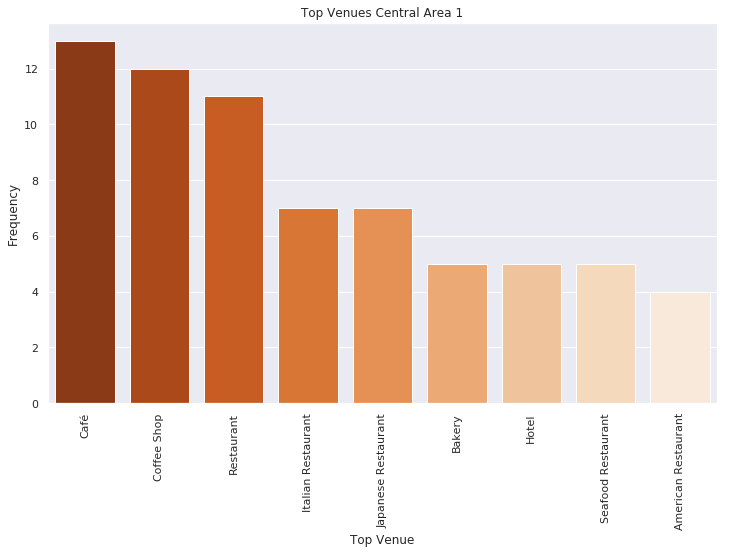

In [76]:
#Counting frequency of Top Venues in Central downtown Toronto
Count_Central_DTT = Count_Freq(Central4_Orange)

#Plot the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize = (12,7))

ax = sns.barplot(x= 'Top Venue', y = 'Count', data = Count_Central_DTT, palette = 'Oranges_r')
ax.set(title = 'Top Venues Central Area 1',
       ylabel = 'Frequency')
for item in ax.get_xticklabels():
    item.set_rotation(90)




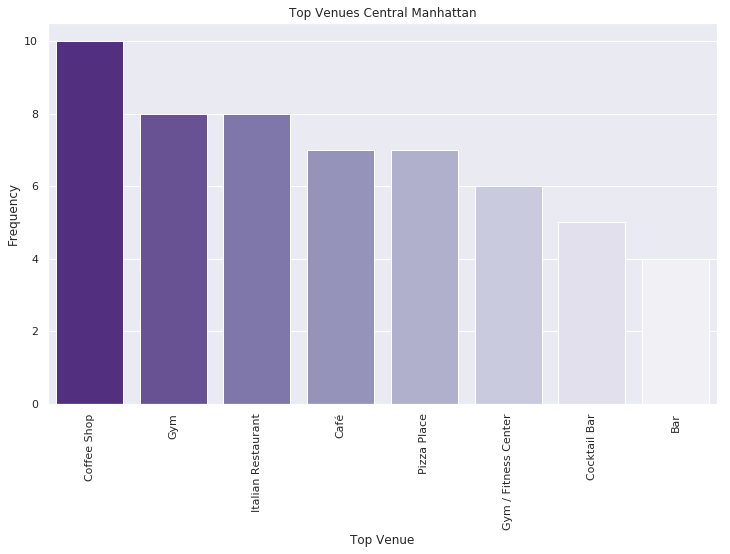

In [77]:
#Counting frequency of Top Venues in Central downtown Toronto
Count_Central_Manhattan = Count_Freq(Central)

#Plot the results

fig, ax = plt.subplots(figsize = (12,7))

ax = sns.barplot(x= 'Top Venue', y = 'Count', data = Count_Central_Manhattan, palette = 'Purples_r')
ax.set(title = 'Top Venues Central Manhattan',
       ylabel = 'Frequency')
for item in ax.get_xticklabels():
    item.set_rotation(90)





# 5. Discussion
Refer to full report

# 6. Conclusion
Refer to full report